In [1]:
import xarray as xr
import pyinterp
import pyinterp.tests
import pyinterp.backends.xarray #
import pyinterp.fill #
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy
import scipy.stats as stats
from scipy.cluster.vq import * #comment out
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pylab
from mpl_toolkits.axes_grid1 import make_axes_locatable #
import shapely.vectorized
import regionmask
#wd = "/glade/work/drjones/enve5810_project/all_files_7/output2/"
wd = "/Users/jonesdr/iCloud/com~apple~CloudDocs/uconn/classes/enve5810_hydrometeorology/project/raw_data/spei_data/"
bcc_2044 = xr.open_dataset(wd + "bcc_2044_spei.nc").fillna(0)
bcc_2100 = xr.open_dataset(wd + "bcc_2100_spei.nc").fillna(0)
can_2044 = xr.open_dataset(wd + "can_2044_spei.nc").fillna(0)
can_2100 = xr.open_dataset(wd + "can_2100_spei.nc").fillna(0)
miroc_2044 = xr.open_dataset(wd + "miroc_2044_spei.nc").fillna(0)
miroc_2100 = xr.open_dataset(wd + "miroc_2100_spei.nc").fillna(0)
mri_2044 = xr.open_dataset(wd + "mri_2044_spei.nc").fillna(0)
mri_2100 = xr.open_dataset(wd + "mri_2100_spei.nc").fillna(0)
speidb = xr.open_dataset(wd + "spei_database_control_12mon.nc").fillna(0)

#bcc_2044.sel(time = 1).spei12mon

Initial calculation of different time periods and summer mean datasets.

In [2]:
spring_mon = 3
summer_mon = 6
fall_mon = 9
winter_mon = 12
season_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
season_init_list = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
spring_mon_name = season_list[spring_mon - 1]
summer_mon_name = season_list[summer_mon - 1]
fall_mon_name = season_list[fall_mon - 1]
winter_mon_name = season_list[winter_mon - 1]
gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#land = regionmask.defined_regions.natural_earth_v5_0_0.land_110.land_mask(bcc_2044_summer_mean.lon, bcc_2044_summer_mean.lat)
bcc_land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(bcc_2044.isel(time = 0))
can_land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(can_2044.isel(time = 0))
miroc_land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(miroc_2044.isel(time = 0))
mri_land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(mri_2044.isel(time = 0))
#fig = plt.figure(figsize = (95/10, 55/10))
#ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
#ax.set_extent([-140, -45, 10, 65], ccrs.PlateCarree())
#mri_land_mask.plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree())
bcc_15_44_sum = bcc_2044.isel(time = np.arange(summer_mon - 1, 361, 12))
bcc_15_44_summean = bcc_15_44_sum.mean(dim = "time")
can_15_44_sum = can_2044.isel(time = np.arange(summer_mon - 1, 361, 12))
can_15_44_summean = can_15_44_sum.mean(dim = "time")
miroc_15_44_sum = miroc_2044.isel(time = np.arange(summer_mon - 1, 361, 12))
mri_15_44_sum = mri_2044.isel(time = np.arange(summer_mon - 1, 361, 12))

#allens_15_44_summean = 

bcc_71_00_sum = bcc_2100.isel(time = np.arange(summer_mon - 1, 361, 12))


bcc_15_44_win = bcc_2044.isel(time = np.arange(winter_mon - 1, 361, 12))
can_15_44_win = can_2044.isel(time = np.arange(winter_mon - 1, 361, 12))
miroc_15_44_win = miroc_2044.isel(time = np.arange(winter_mon - 1, 361, 12))
mri_15_44_win = mri_2044.isel(time = np.arange(winter_mon - 1, 361, 12))

speidb_last6yr = speidb.isel(time = np.arange(1380, 1452)).sel(lon = np.arange(-140, -45), lat = np.arange(10, 65), method = "nearest")

Presentation (horizontal) style initial testing slide figure

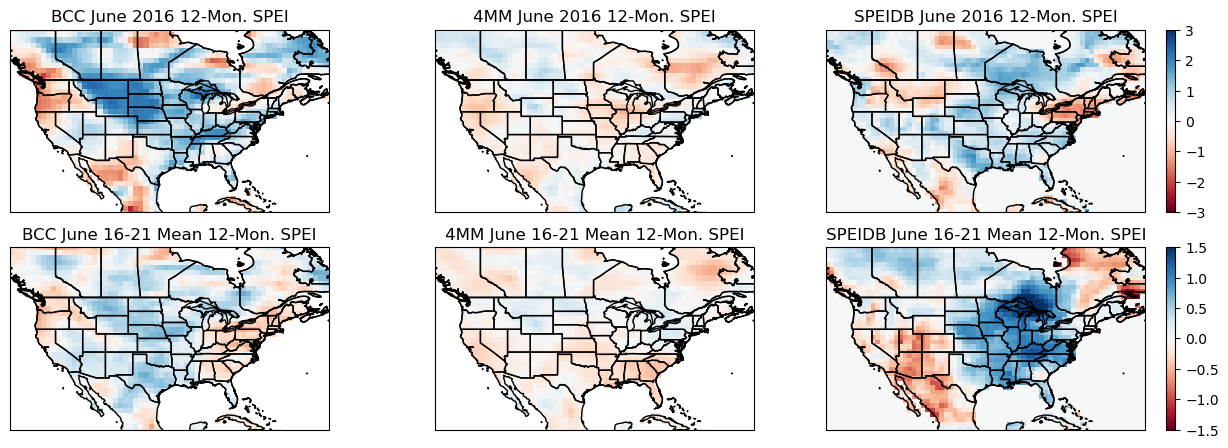

In [3]:
#%matplotlib inline #qt
map_extent = [-130, -60, 20, 60]

fig = plt.figure(figsize = (13, 4.5))#, facecolor = "#f1f0f3")
ax1 = fig.add_subplot(2, 3, 1, projection = ccrs.PlateCarree())
ax1.set_extent(map_extent, ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
fill1 = ax1.pcolormesh(bcc_2044.lon, bcc_2044.lat, bcc_2044.sel(time = 18).spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -3, vmax = 3)
ax1.set_title("BCC June 2016 12-Mon. SPEI")

ax2 = fig.add_subplot(2, 3, 2, projection = ccrs.PlateCarree())
ax2.set_extent(map_extent, ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.STATES)
ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.COASTLINE)
bcc_16_sum = bcc_2044.sel(time = 18).where(bcc_land_mask == 0)
can_16_sum = can_2044.sel(time = 18).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).where(bcc_land_mask == 0)
miroc_16_sum = miroc_2044.sel(time = 18).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).where(bcc_land_mask == 0)
mri_16_sum = mri_2044.sel(time = 18).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).where(bcc_land_mask == 0)
ensall_16_sum = (bcc_16_sum + can_16_sum + miroc_16_sum + mri_16_sum) / 4
fill2 = ax2.pcolormesh(bcc_2044.lon, bcc_2044.lat, ensall_16_sum.spei12mon, cmap = "RdBu", vmin = -3, vmax = 3)
ax2.set_title("4MM June 2016 12-Mon. SPEI")



ax3 = fig.add_subplot(2, 3, 3, projection = ccrs.PlateCarree())
ax3.set_extent(map_extent, ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.STATES)
ax3.add_feature(cfeature.BORDERS)
ax3.add_feature(cfeature.COASTLINE)
fill3 = ax3.pcolormesh(speidb_last6yr.lon, speidb_last6yr.lat, speidb_last6yr.isel(time = 5).spei, cmap = "RdBu", vmin = -3, vmax = 3)
ax3.set_title("SPEIDB June 2016 12-Mon. SPEI")



ax4 = fig.add_subplot(2, 3, 4, projection = ccrs.PlateCarree())
ax4.set_extent(map_extent, ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND)
ax4.add_feature(cfeature.STATES)
ax4.add_feature(cfeature.BORDERS)
ax4.add_feature(cfeature.COASTLINE)
bcc_16_21_sum = bcc_2044.sel(time = [18, 30, 42, 54, 66, 78]).mean(dim = "time")
fill4 = ax4.pcolormesh(bcc_2044.lon, bcc_2044.lat, bcc_16_21_sum.spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -1.5, vmax = 1.5)
ax4.set_title("BCC June 16-21 Mean 12-Mon. SPEI")




ax5 = fig.add_subplot(2, 3, 5, projection = ccrs.PlateCarree())
ax5.set_extent(map_extent, ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND)
ax5.add_feature(cfeature.STATES)
ax5.add_feature(cfeature.BORDERS)
ax5.add_feature(cfeature.COASTLINE)
#can_interp2 = can_2044.sel(time = 18).interp(lon = bcc_2044.lon, lat = bcc_2044.lat)
can_16_21_sum = can_2044.sel(time = [18, 30, 42, 54, 66, 78]).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
miroc_16_21_sum = miroc_2044.sel(time = [18, 30, 42, 54, 66, 78]).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
mri_16_21_sum = mri_2044.sel(time = [18, 30, 42, 54, 66, 78]).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
ensall_16_21_sum = (bcc_16_21_sum + can_16_21_sum + miroc_16_21_sum + mri_16_21_sum) / 4
fill5 = ax5.pcolormesh(bcc_2044.lon, bcc_2044.lat, ensall_16_21_sum.spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -1.5, vmax = 1.5)
ax5.set_title("4MM June 16-21 Mean 12-Mon. SPEI")


ax6 = fig.add_subplot(2, 3, 6, projection = ccrs.PlateCarree())
ax6.set_extent(map_extent, ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND)
ax6.add_feature(cfeature.STATES)
ax6.add_feature(cfeature.BORDERS)
ax6.add_feature(cfeature.COASTLINE)
speidb_16_21_sum = speidb_last6yr.isel(time = np.arange(5, 73, 12)).mean(dim = "time")
fill6 = ax6.pcolormesh(speidb_last6yr.lon, speidb_last6yr.lat, speidb_16_21_sum.spei, cmap = "RdBu", vmin = -1.5, vmax = 1.5)
ax6.set_title("SPEIDB June 16-21 Mean 12-Mon. SPEI")

#cax = fig.add_axes(width = ax2.get_position().x1+0.01, height = ax2.get_position().height)
#fig.colorbar(fill1)
#fig.colorbar(fill2)
fig.colorbar(fill3, location = "right")
#fig.colorbar(fill4)
#fig.colorbar(fill5)
fig.colorbar(fill6, location = "right")
fig.tight_layout()
### uncomment to save figure vvv
#fig.savefig("model_and_speidb_comparison_presentation.png", transparent = True)



Report (vertical) style initial testing slide figure

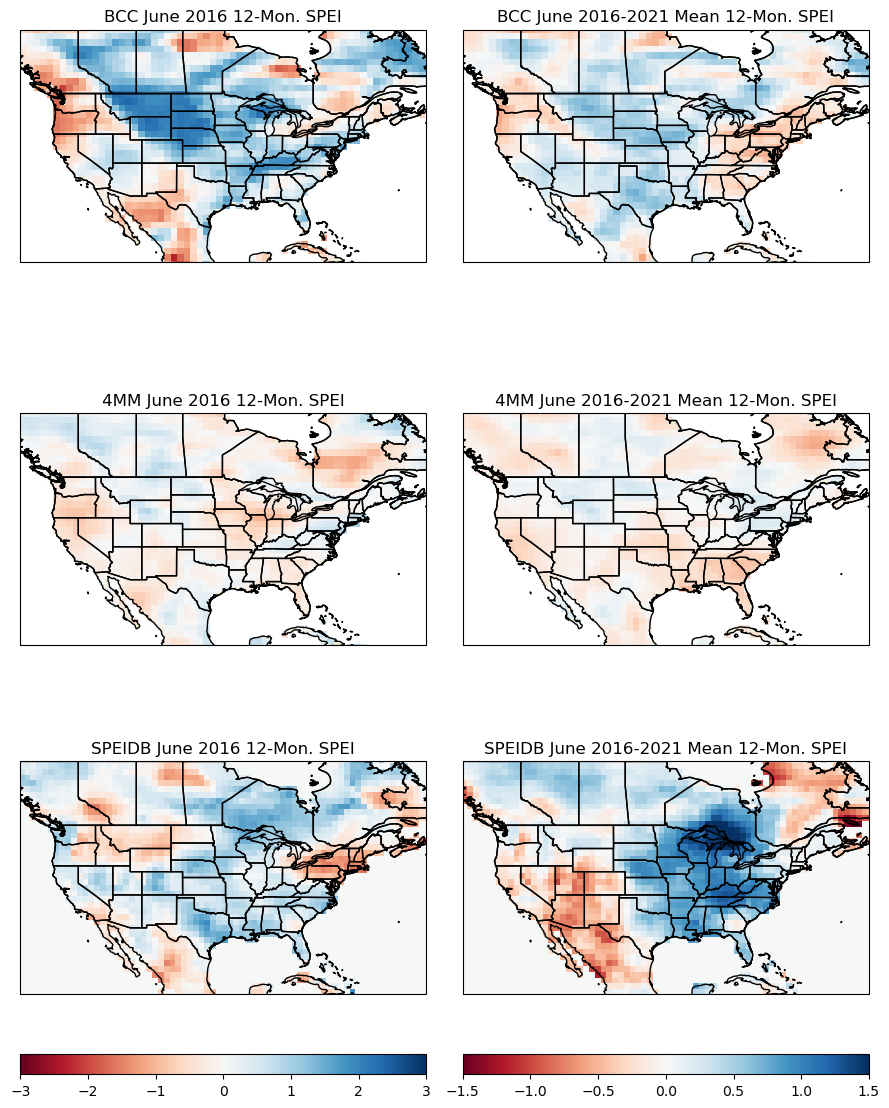

In [4]:
#%matplotlib inline #qt
map_extent = [-130, -60, 20, 60]

fig = plt.figure(figsize = (9, 12))
ax1 = fig.add_subplot(3, 2, 1, projection = ccrs.PlateCarree())
ax1.set_extent(map_extent, ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
fill1 = ax1.pcolormesh(bcc_2044.lon, bcc_2044.lat, bcc_2044.sel(time = 18).spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -3, vmax = 3)
ax1.set_title("BCC June 2016 12-Mon. SPEI")

ax2 = fig.add_subplot(3, 2, 3, projection = ccrs.PlateCarree())
ax2.set_extent(map_extent, ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.STATES)
ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.COASTLINE)
bcc_16_sum = bcc_2044.sel(time = 18).where(bcc_land_mask == 0)
can_16_sum = can_2044.sel(time = 18).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).where(bcc_land_mask == 0)
miroc_16_sum = miroc_2044.sel(time = 18).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).where(bcc_land_mask == 0)
mri_16_sum = mri_2044.sel(time = 18).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).where(bcc_land_mask == 0)
ensall_16_sum = (bcc_16_sum + can_16_sum + miroc_16_sum + mri_16_sum) / 4
fill2 = ax2.pcolormesh(bcc_2044.lon, bcc_2044.lat, ensall_16_sum.spei12mon, cmap = "RdBu", vmin = -3, vmax = 3)
ax2.set_title("4MM June 2016 12-Mon. SPEI")



ax3 = fig.add_subplot(3, 2, 5, projection = ccrs.PlateCarree())
ax3.set_extent(map_extent, ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.STATES)
ax3.add_feature(cfeature.BORDERS)
ax3.add_feature(cfeature.COASTLINE)
fill3 = ax3.pcolormesh(speidb_last6yr.lon, speidb_last6yr.lat, speidb_last6yr.isel(time = 5).spei, cmap = "RdBu", vmin = -3, vmax = 3)
ax3.set_title("SPEIDB June 2016 12-Mon. SPEI")



ax4 = fig.add_subplot(3, 2, 2, projection = ccrs.PlateCarree())
ax4.set_extent(map_extent, ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND)
ax4.add_feature(cfeature.STATES)
ax4.add_feature(cfeature.BORDERS)
ax4.add_feature(cfeature.COASTLINE)
bcc_16_21_sum = bcc_2044.sel(time = [18, 30, 42, 54, 66, 78]).mean(dim = "time")
fill4 = ax4.pcolormesh(bcc_2044.lon, bcc_2044.lat, bcc_16_21_sum.spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -1.5, vmax = 1.5)
ax4.set_title("BCC June 2016-2021 Mean 12-Mon. SPEI")




ax5 = fig.add_subplot(3, 2, 4, projection = ccrs.PlateCarree())
ax5.set_extent(map_extent, ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND)
ax5.add_feature(cfeature.STATES)
ax5.add_feature(cfeature.BORDERS)
ax5.add_feature(cfeature.COASTLINE)
#can_interp2 = can_2044.sel(time = 18).interp(lon = bcc_2044.lon, lat = bcc_2044.lat)
can_16_21_sum = can_2044.sel(time = [18, 30, 42, 54, 66, 78]).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
miroc_16_21_sum = miroc_2044.sel(time = [18, 30, 42, 54, 66, 78]).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
mri_16_21_sum = mri_2044.sel(time = [18, 30, 42, 54, 66, 78]).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
ensall_16_21_sum = (bcc_16_21_sum + can_16_21_sum + miroc_16_21_sum + mri_16_21_sum) / 4
fill5 = ax5.pcolormesh(bcc_2044.lon, bcc_2044.lat, ensall_16_21_sum.spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -1.5, vmax = 1.5)
ax5.set_title("4MM June 2016-2021 Mean 12-Mon. SPEI")


ax6 = fig.add_subplot(3, 2, 6, projection = ccrs.PlateCarree())
ax6.set_extent(map_extent, ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND)
ax6.add_feature(cfeature.STATES)
ax6.add_feature(cfeature.BORDERS)
ax6.add_feature(cfeature.COASTLINE)
speidb_16_21_sum = speidb_last6yr.isel(time = np.arange(5, 73, 12)).mean(dim = "time")
fill6 = ax6.pcolormesh(speidb_last6yr.lon, speidb_last6yr.lat, speidb_16_21_sum.spei, cmap = "RdBu", vmin = -1.5, vmax = 1.5)
ax6.set_title("SPEIDB June 2016-2021 Mean 12-Mon. SPEI")

#cax = fig.add_axes(width = ax2.get_position().x1+0.01, height = ax2.get_position().height)
#fig.colorbar(fill1)
#fig.colorbar(fill2)
fig.colorbar(fill3, location = "bottom")
#fig.colorbar(fill4)
#fig.colorbar(fill5)
fig.colorbar(fill6, location = "bottom")
fig.tight_layout()
#fig.savefig("model_and_speidb_comparison.png")



Presentation (horizontal) style final figure

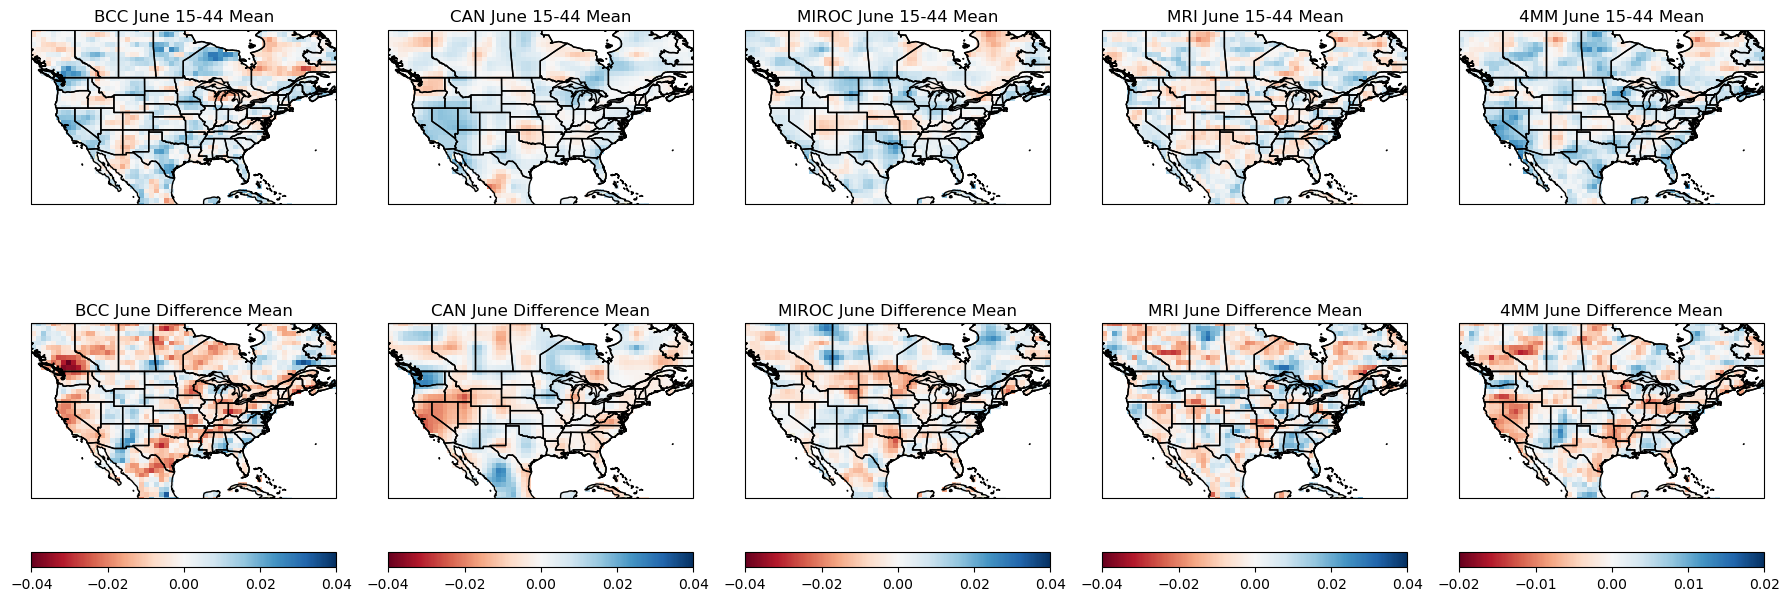

In [5]:
#%matplotlib qt
#%matplotlib inline
fig = plt.figure(figsize = (18, 7))



ax1 = fig.add_subplot(2, 5, 1, projection = ccrs.PlateCarree())
ax1.set_extent(map_extent, ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
bcc_44_summean_mask = bcc_2044.sel(time = np.arange(18, 361, 12)).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
fill1 = ax1.pcolormesh(bcc_2044.lon, bcc_2044.lat, bcc_44_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax1.set_title("BCC June 15-44 Mean")



ax2 = fig.add_subplot(2, 5, 6, projection = ccrs.PlateCarree())
ax2.set_extent(map_extent, ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.STATES)
ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.COASTLINE)
bcc_00_summean_mask = bcc_2100.sel(time = np.arange(846, 1201, 12)).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
bcc_diff_summean_mask = bcc_00_summean_mask - bcc_44_summean_mask
fill2 = ax2.pcolormesh(bcc_2044.lon, bcc_2044.lat, bcc_diff_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax2.set_title("BCC June Difference Mean")


ax3 = fig.add_subplot(2, 5, 2, projection = ccrs.PlateCarree())
ax3.set_extent(map_extent, ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.STATES)
ax3.add_feature(cfeature.BORDERS)
ax3.add_feature(cfeature.COASTLINE)
can_44_summean_mask = can_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
fill3 = ax3.pcolormesh(bcc_2044.lon, bcc_2044.lat, can_44_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax3.set_title("CAN June 15-44 Mean")


ax4 = fig.add_subplot(2, 5, 7, projection = ccrs.PlateCarree())
ax4.set_extent(map_extent, ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND)
ax4.add_feature(cfeature.STATES)
ax4.add_feature(cfeature.BORDERS)
ax4.add_feature(cfeature.COASTLINE)
can_00_summean_mask = can_2100.sel(time = np.arange(846, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
can_diff_summean_mask = can_00_summean_mask - can_44_summean_mask
fill4 = ax4.pcolormesh(bcc_2044.lon, bcc_2044.lat, can_diff_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax4.set_title("CAN June Difference Mean")


ax5 = fig.add_subplot(2, 5, 3, projection = ccrs.PlateCarree())
ax5.set_extent(map_extent, ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND)
ax5.add_feature(cfeature.STATES)
ax5.add_feature(cfeature.BORDERS)
ax5.add_feature(cfeature.COASTLINE)
miroc_44_summean_mask = miroc_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
fill5 = ax5.pcolormesh(bcc_2044.lon, bcc_2044.lat, miroc_44_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax5.set_title("MIROC June 15-44 Mean")



ax6 = fig.add_subplot(2, 5, 8, projection = ccrs.PlateCarree())
ax6.set_extent(map_extent, ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND)
ax6.add_feature(cfeature.STATES)
ax6.add_feature(cfeature.BORDERS)
ax6.add_feature(cfeature.COASTLINE)
miroc_00_summean_mask = miroc_2100.sel(time = np.arange(846, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
miroc_diff_summean_mask = miroc_00_summean_mask - miroc_44_summean_mask
fill6 = ax6.pcolormesh(bcc_2044.lon, bcc_2044.lat, miroc_diff_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax6.set_title("MIROC June Difference Mean")


ax7 = fig.add_subplot(2, 5, 4, projection = ccrs.PlateCarree())
ax7.set_extent(map_extent, ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND)
ax7.add_feature(cfeature.STATES)
ax7.add_feature(cfeature.BORDERS)
ax7.add_feature(cfeature.COASTLINE)
mri_44_summean_mask = mri_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
fill7 = ax7.pcolormesh(bcc_2044.lon, bcc_2044.lat, mri_44_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax7.set_title("MRI June 15-44 Mean")



ax8 = fig.add_subplot(2, 5, 9, projection = ccrs.PlateCarree())
ax8.set_extent(map_extent, ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND)
ax8.add_feature(cfeature.STATES)
ax8.add_feature(cfeature.BORDERS)
ax8.add_feature(cfeature.COASTLINE)
mri_00_summean_mask = mri_2100.sel(time = np.arange(846, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
mri_diff_summean_mask = mri_00_summean_mask - mri_44_summean_mask
fill8 = ax8.pcolormesh(bcc_2044.lon, bcc_2044.lat, mri_diff_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax8.set_title("MRI June Difference Mean")



ax9 = fig.add_subplot(2, 5, 5, projection = ccrs.PlateCarree())
ax9.set_extent(map_extent, ccrs.PlateCarree())
ax9.add_feature(cfeature.LAND)
ax9.add_feature(cfeature.STATES)
ax9.add_feature(cfeature.BORDERS)
ax9.add_feature(cfeature.COASTLINE)
bcc_44_summean = bcc_2044.sel(time = np.arange(18, 361, 12)).mean(dim = "time")
can_44_summean = can_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
miroc_44_summean = miroc_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
mri_44_summean = mri_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
all_44_summean = (bcc_44_summean + can_44_summean + miroc_44_summean + mri_44_summean) / 4
fill9 = ax9.pcolormesh(bcc_2044.lon, bcc_2044.lat, all_44_summean.spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -0.02, vmax = 0.02)
ax9.set_title("4MM June 15-44 Mean")

ax10 = fig.add_subplot(2, 5, 10, projection = ccrs.PlateCarree())
ax10.set_extent(map_extent, ccrs.PlateCarree())
ax10.add_feature(cfeature.LAND)
ax10.add_feature(cfeature.STATES)
ax10.add_feature(cfeature.BORDERS)
ax10.add_feature(cfeature.COASTLINE)
bcc_00_summean = bcc_2100.sel(time = np.arange(858, 1201, 12)).mean(dim = "time")
can_00_summean = can_2100.sel(time = np.arange(858, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
miroc_00_summean = miroc_2100.sel(time = np.arange(858, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
mri_00_summean = mri_2100.sel(time = np.arange(858, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
all_00_summean = (bcc_00_summean + can_00_summean + miroc_00_summean + mri_00_summean) / 4
all_diff_summean = all_00_summean - all_44_summean
fill10 = ax10.pcolormesh(bcc_2044.lon, bcc_2044.lat, all_diff_summean.spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -0.02, vmax = 0.02)
ax10.set_title("4MM June Difference Mean")

#do a diff plot!?!

"""
ax8 = fig.add_subplot(2, 5, 10, projection = ccrs.PlateCarree())
ax8.set_extent(map_extent, ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND)
ax8.add_feature(cfeature.STATES)
ax8.add_feature(cfeature.BORDERS)
ax8.add_feature(cfeature.COASTLINE)
fill8 = ax8.pcolormesh(bcc_2044.lon, bcc_2044.lat, ens_year.sel(time = np.arange(846, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax8.set_title("spei12mon mri june 2071-2100")
"""
#fig.colorbar(fill1)
#fig.colorbar(fill3)
#fig.colorbar(fill5, location = "right")
#fig.colorbar(fill7)
#fig.colorbar(fill9, location = "right")
fig.colorbar(fill2, location = "bottom")
fig.colorbar(fill4, location = "bottom")
fig.colorbar(fill6, location = "bottom")
fig.colorbar(fill8, location = "bottom")
fig.colorbar(fill10, location = "bottom")
#all_summean
#fig.suptitle("Mean 12-Month SPEI")
fig.tight_layout()
#plt.savefig("allmodels_first_and_diff_12mon_presentation.png", transparent = True)

Report (vertical) style final figure

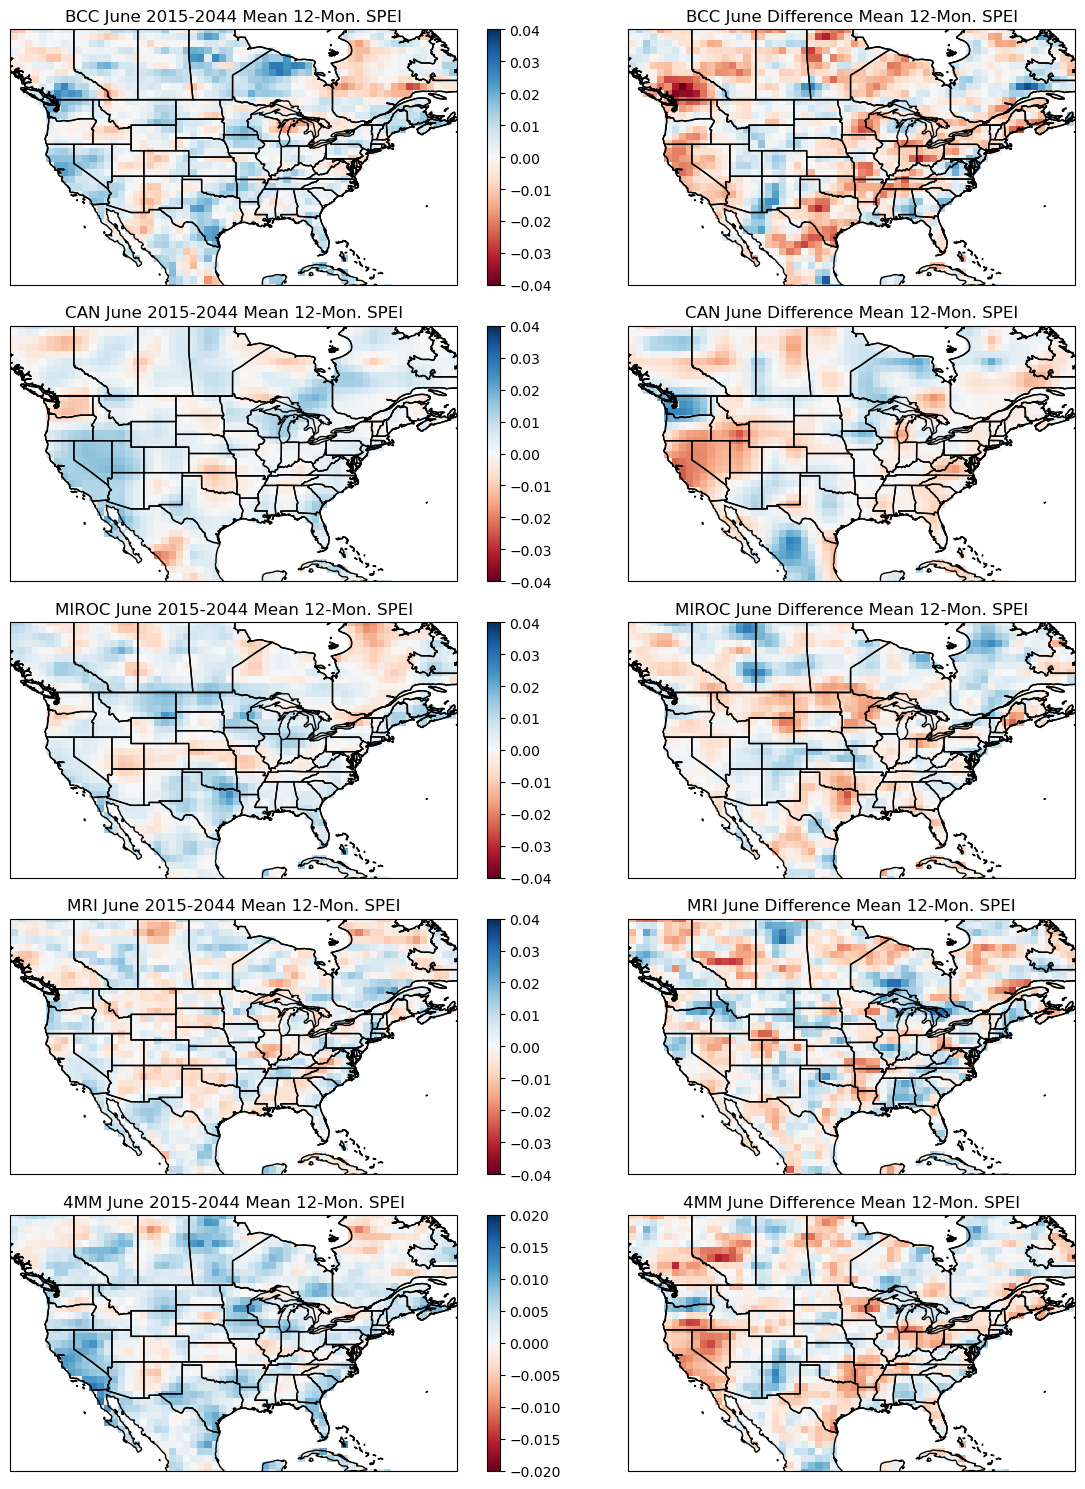

In [16]:
#%matplotlib qt
#%matplotlib inline
fig = plt.figure(figsize = (12, 15))



ax1 = fig.add_subplot(5, 2, 1, projection = ccrs.PlateCarree())
ax1.set_extent(map_extent, ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
bcc_44_summean_mask = bcc_2044.sel(time = np.arange(18, 361, 12)).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
fill1 = ax1.pcolormesh(bcc_2044.lon, bcc_2044.lat, bcc_44_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax1.set_title("BCC June 2015-2044 Mean 12-Mon. SPEI")



ax2 = fig.add_subplot(5, 2, 2, projection = ccrs.PlateCarree())
ax2.set_extent(map_extent, ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.STATES)
ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.COASTLINE)
bcc_00_summean_mask = bcc_2100.sel(time = np.arange(846, 1201, 12)).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
bcc_diff_summean_mask = bcc_00_summean_mask - bcc_44_summean_mask
fill2 = ax2.pcolormesh(bcc_2044.lon, bcc_2044.lat, bcc_diff_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax2.set_title("BCC June Difference Mean 12-Mon. SPEI")


ax3 = fig.add_subplot(5, 2, 3, projection = ccrs.PlateCarree())
ax3.set_extent(map_extent, ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.STATES)
ax3.add_feature(cfeature.BORDERS)
ax3.add_feature(cfeature.COASTLINE)
can_44_summean_mask = can_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
fill3 = ax3.pcolormesh(bcc_2044.lon, bcc_2044.lat, can_44_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax3.set_title("CAN June 2015-2044 Mean 12-Mon. SPEI")


ax4 = fig.add_subplot(5, 2, 4, projection = ccrs.PlateCarree())
ax4.set_extent(map_extent, ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND)
ax4.add_feature(cfeature.STATES)
ax4.add_feature(cfeature.BORDERS)
ax4.add_feature(cfeature.COASTLINE)
can_00_summean_mask = can_2100.sel(time = np.arange(846, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
can_diff_summean_mask = can_00_summean_mask - can_44_summean_mask
fill4 = ax4.pcolormesh(bcc_2044.lon, bcc_2044.lat, can_diff_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax4.set_title("CAN June Difference Mean 12-Mon. SPEI")


ax5 = fig.add_subplot(5, 2, 5, projection = ccrs.PlateCarree())
ax5.set_extent(map_extent, ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND)
ax5.add_feature(cfeature.STATES)
ax5.add_feature(cfeature.BORDERS)
ax5.add_feature(cfeature.COASTLINE)
miroc_44_summean_mask = miroc_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
fill5 = ax5.pcolormesh(bcc_2044.lon, bcc_2044.lat, miroc_44_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax5.set_title("MIROC June 2015-2044 Mean 12-Mon. SPEI")



ax6 = fig.add_subplot(5, 2, 6, projection = ccrs.PlateCarree())
ax6.set_extent(map_extent, ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND)
ax6.add_feature(cfeature.STATES)
ax6.add_feature(cfeature.BORDERS)
ax6.add_feature(cfeature.COASTLINE)
miroc_00_summean_mask = miroc_2100.sel(time = np.arange(846, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
miroc_diff_summean_mask = miroc_00_summean_mask - miroc_44_summean_mask
fill6 = ax6.pcolormesh(bcc_2044.lon, bcc_2044.lat, miroc_diff_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax6.set_title("MIROC June Difference Mean 12-Mon. SPEI")


ax7 = fig.add_subplot(5, 2, 7, projection = ccrs.PlateCarree())
ax7.set_extent(map_extent, ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND)
ax7.add_feature(cfeature.STATES)
ax7.add_feature(cfeature.BORDERS)
ax7.add_feature(cfeature.COASTLINE)
mri_44_summean_mask = mri_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
fill7 = ax7.pcolormesh(bcc_2044.lon, bcc_2044.lat, mri_44_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax7.set_title("MRI June 2015-2044 Mean 12-Mon. SPEI")



ax8 = fig.add_subplot(5, 2, 8, projection = ccrs.PlateCarree())
ax8.set_extent(map_extent, ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND)
ax8.add_feature(cfeature.STATES)
ax8.add_feature(cfeature.BORDERS)
ax8.add_feature(cfeature.COASTLINE)
mri_00_summean_mask = mri_2100.sel(time = np.arange(846, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0)
mri_diff_summean_mask = mri_00_summean_mask - mri_44_summean_mask
fill8 = ax8.pcolormesh(bcc_2044.lon, bcc_2044.lat, mri_diff_summean_mask, cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax8.set_title("MRI June Difference Mean 12-Mon. SPEI")



ax9 = fig.add_subplot(5, 2, 9, projection = ccrs.PlateCarree())
ax9.set_extent(map_extent, ccrs.PlateCarree())
ax9.add_feature(cfeature.LAND)
ax9.add_feature(cfeature.STATES)
ax9.add_feature(cfeature.BORDERS)
ax9.add_feature(cfeature.COASTLINE)
bcc_44_summean = bcc_2044.sel(time = np.arange(18, 361, 12)).mean(dim = "time")
can_44_summean = can_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
miroc_44_summean = miroc_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
mri_44_summean = mri_2044.sel(time = np.arange(18, 361, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
all_44_summean = (bcc_44_summean + can_44_summean + miroc_44_summean + mri_44_summean) / 4
fill9 = ax9.pcolormesh(bcc_2044.lon, bcc_2044.lat, all_44_summean.spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -0.02, vmax = 0.02)
ax9.set_title("4MM June 2015-2044 Mean 12-Mon. SPEI")

ax10 = fig.add_subplot(5, 2, 10, projection = ccrs.PlateCarree())
ax10.set_extent(map_extent, ccrs.PlateCarree())
ax10.add_feature(cfeature.LAND)
ax10.add_feature(cfeature.STATES)
ax10.add_feature(cfeature.BORDERS)
ax10.add_feature(cfeature.COASTLINE)
bcc_00_summean = bcc_2100.sel(time = np.arange(858, 1201, 12)).mean(dim = "time")
can_00_summean = can_2100.sel(time = np.arange(858, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
miroc_00_summean = miroc_2100.sel(time = np.arange(858, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
mri_00_summean = mri_2100.sel(time = np.arange(858, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time")
all_00_summean = (bcc_00_summean + can_00_summean + miroc_00_summean + mri_00_summean) / 4
all_diff_summean = all_00_summean - all_44_summean
fill10 = ax10.pcolormesh(bcc_2044.lon, bcc_2044.lat, all_diff_summean.spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -0.02, vmax = 0.02)
ax10.set_title("4MM June Difference Mean 12-Mon. SPEI")

#do a diff plot!?!

"""
ax8 = fig.add_subplot(5, 2, 10, projection = ccrs.PlateCarree())
ax8.set_extent(map_extent, ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND)
ax8.add_feature(cfeature.STATES)
ax8.add_feature(cfeature.BORDERS)
ax8.add_feature(cfeature.COASTLINE)
fill8 = ax8.pcolormesh(bcc_2044.lon, bcc_2044.lat, ens_year.sel(time = np.arange(846, 1201, 12)).interp(lon = bcc_2044.lon, lat = bcc_2044.lat).mean(dim = "time").spei12mon.where(bcc_land_mask == 0), cmap = "RdBu", vmin = -0.04, vmax = 0.04)
ax8.set_title("spei12mon mri june 2071-2100")
"""
fig.colorbar(fill1)
fig.colorbar(fill3)
fig.colorbar(fill5)
fig.colorbar(fill7)
fig.colorbar(fill9)
#all_summean
#fig.suptitle("Mean 12-Month SPEI")
fig.tight_layout()
#plt.savefig("allmodels_first_and_diff_12mon.png")

Testing function to plot SPEI results from first and difference datasets and test linearity

In [7]:
def line_plotter(x_mask_arr, y_mask_arr, xtext = 0, ytext = 0, x_ax_title = "x axis title missing!", y_ax_title = "y axis title missing!"):
    xarr = x_mask_arr.ravel()
    xarr = xarr[~np.isnan(xarr)]
    yarr = y_mask_arr.ravel()
    yarr = yarr[~np.isnan(yarr)]
    
    x = xarr.reshape((-1, 1))
    y = yarr
    
    reg = LinearRegression().fit(x, y)
    
    xfit = np.linspace(np.min(x)-abs(.1*np.min(x)), np.max(x)+abs(.1*np.max(x)), 1000)
    #yfit = reg.predict(xfit[:, np.newaxis])
    yfit = reg.predict(x)
    
    fig = plt.figure(figsize = (15, 8))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(x, y)
    ax.plot(x, yfit, "red")
    plt.xlabel(x_ax_title)
    plt.ylabel(y_ax_title)
    ax.axhline(y = 0, color = "k", linestyle = "--", alpha = 0.5)
    ax.axvline(x = 0, color = "k", linestyle = "--", alpha = 0.5)
    string = "y = " + str("%.3f" % reg.coef_) + "x + " + str("%.5f" % reg.intercept_) + "\n" + r"$R^2 = $" + str("%.5f" % reg.score(x, y))
    plt.text(xtext, ytext, string, fontsize = 12, ha = "center", va = "center")
    """
    print(len(yfit))
    print("\n")
    
    print("y: ", y)
    print("\n")
    print("yfit: ", yfit)
    print("\n"*3)
    
    print("residuals: ", y - yfit)
    """
    resid = y - yfit
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.scatter(x, resid)
    ax2.axhline(y = 0, color = "k", linestyle = "--", alpha = 0.5)
    furthest = np.max(abs(resid))
    furthest_buff = furthest + furthest * .2
    ax2.set_ylim(-furthest_buff, furthest_buff)
    
    print("sum of resid: ", np.sum(resid))
    
    return (reg.coef_, reg.intercept_, resid, reg.score(x, y))

sum of resid:  4.440892098500626e-16
sum of resid:  2.7755575615628914e-16
sum of resid:  -1.1102230246251565e-16
sum of resid:  0.0
sum of resid:  3.3306690738754696e-16


(array([-0.22535643]),
 0.0024109107491379297,
 array([ 1.62825646e-03,  1.42604746e-03, -2.76500184e-03, ...,
        -2.71122236e-03, -2.71367709e-05,  4.92850704e-04]),
 0.270579420459642)

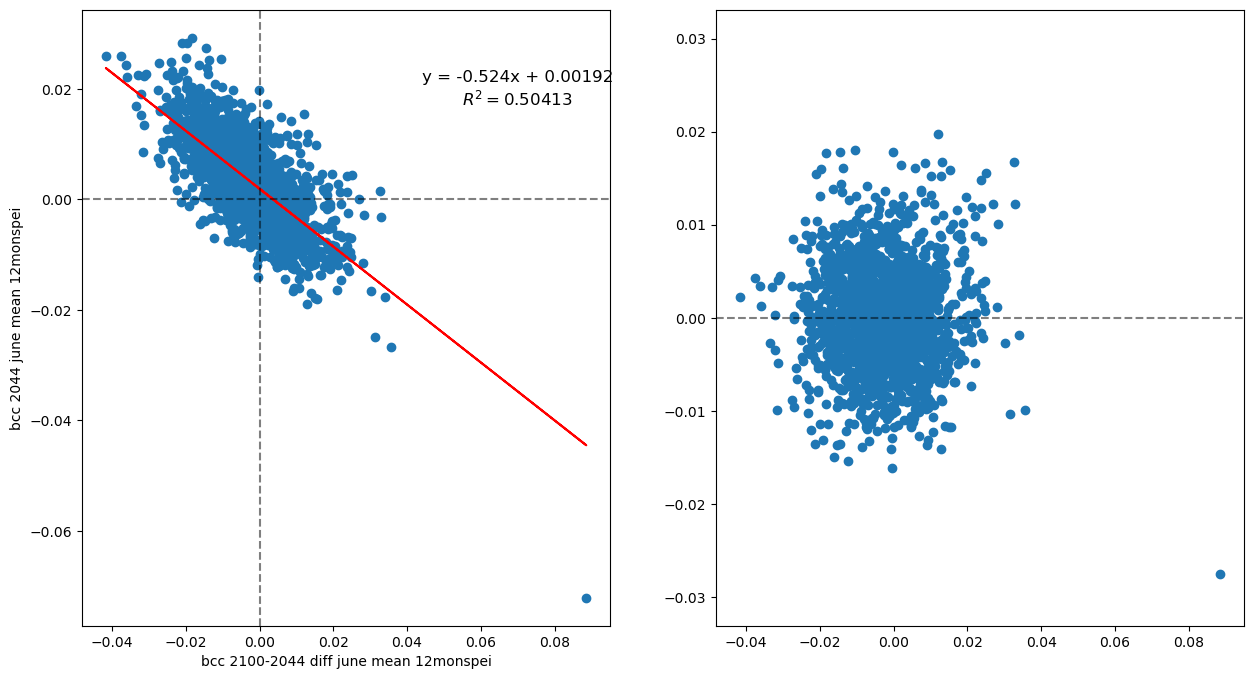

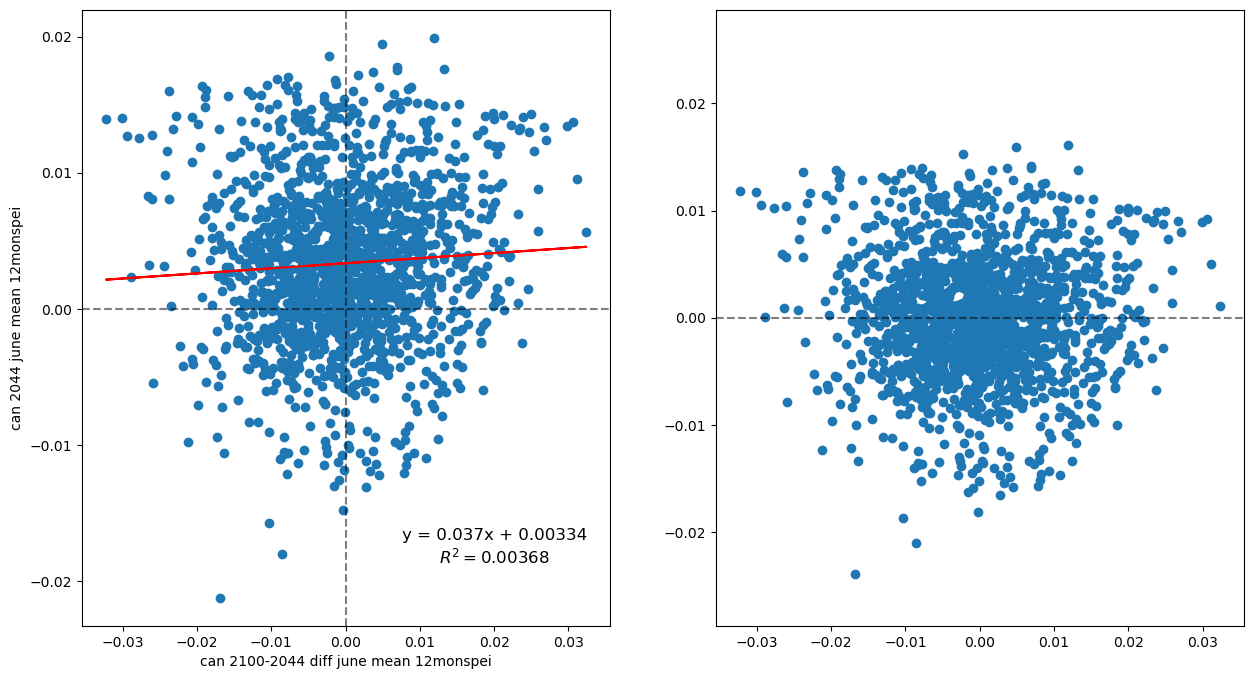

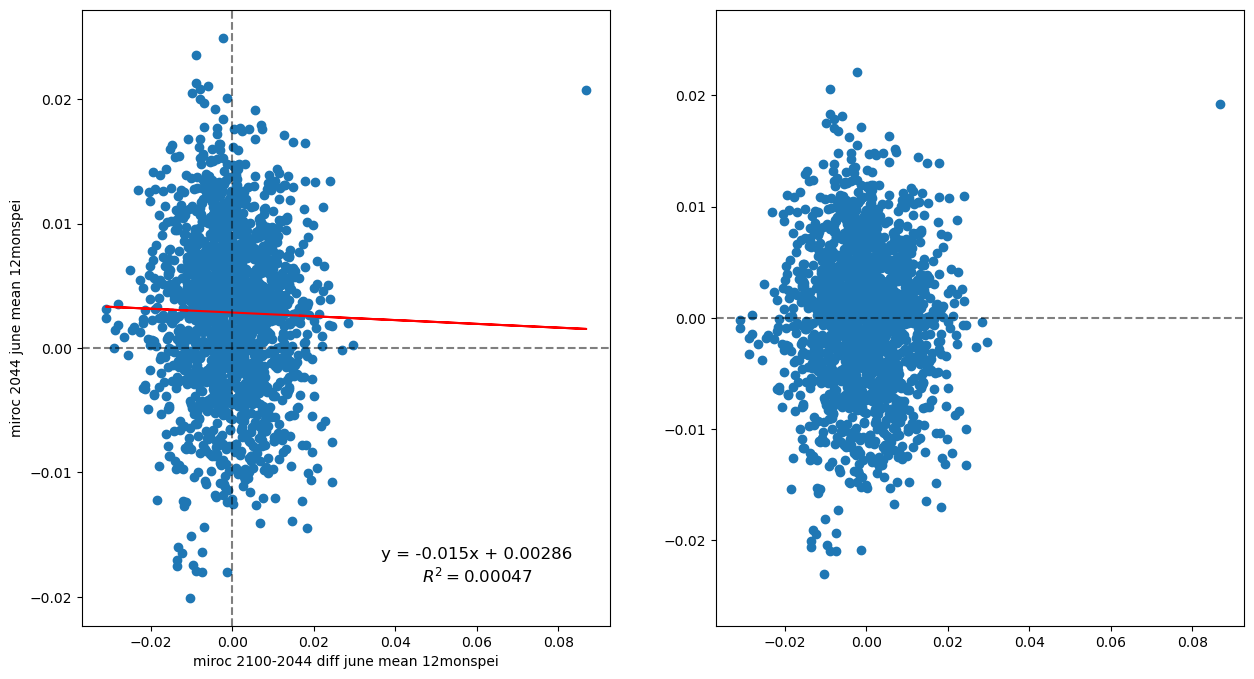

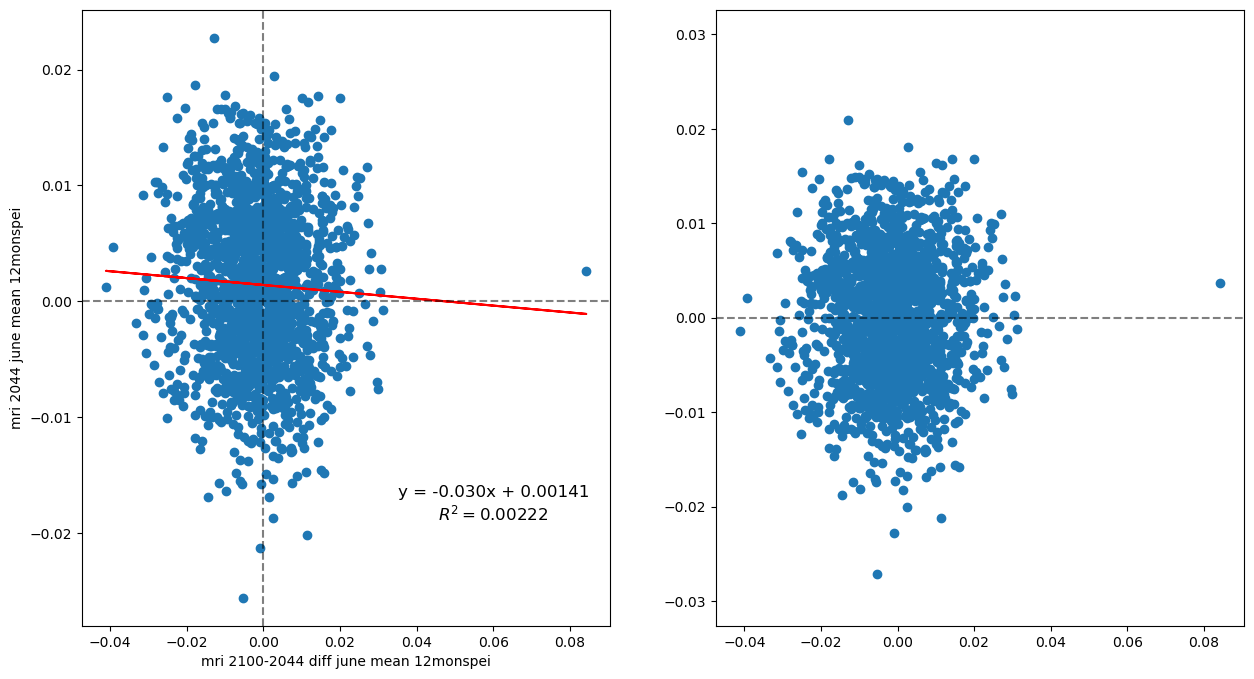

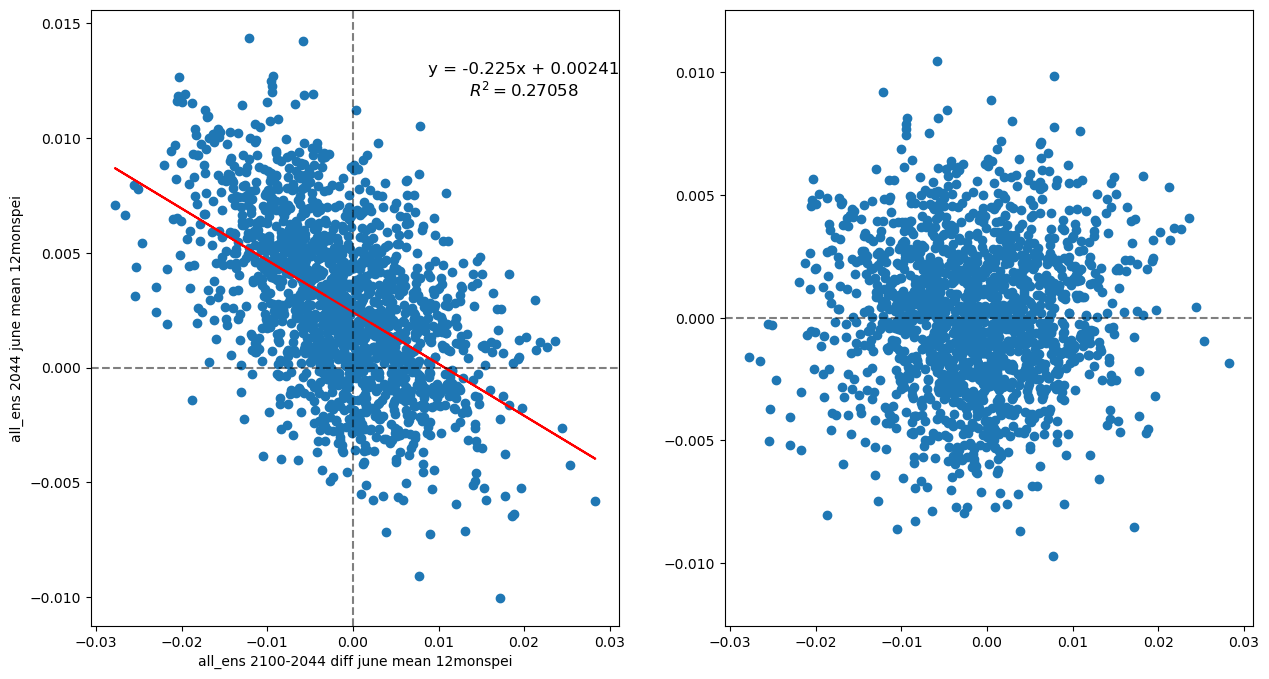

In [8]:
bcc_44_summean_mask = bcc_44_summean.spei12mon.where(bcc_land_mask == 0)
bcc_44_arr = np.array(bcc_44_summean_mask)
bcc_diff_summean_mask = bcc_00_summean.spei12mon.where(bcc_land_mask == 0) - bcc_44_summean_mask
bcc_diff_arr = np.array(bcc_diff_summean_mask)

bcc_coef, bcc_int, bcc_resid, bcc_score = line_plotter(bcc_diff_arr, bcc_44_arr, xtext = 0.07, ytext = 0.02, x_ax_title = "bcc 2100-2044 diff june mean 12monspei", y_ax_title = "bcc 2044 june mean 12monspei")

can_44_summean_mask = can_44_summean.spei12mon.where(bcc_land_mask == 0)
can_44_arr = np.array(can_44_summean_mask)
can_diff_summean_mask = can_00_summean.spei12mon.where(bcc_land_mask == 0) - bcc_44_summean_mask
can_diff_arr = np.array(can_diff_summean_mask)

line_plotter(can_diff_arr, can_44_arr, 0.02, -0.0175, "can 2100-2044 diff june mean 12monspei", "can 2044 june mean 12monspei")

miroc_44_summean_mask = miroc_44_summean.spei12mon.where(bcc_land_mask == 0)
miroc_44_arr = np.array(miroc_44_summean_mask)
miroc_diff_summean_mask = miroc_00_summean.spei12mon.where(bcc_land_mask == 0) - bcc_44_summean_mask
miroc_diff_arr = np.array(miroc_diff_summean_mask)

line_plotter(miroc_diff_arr, miroc_44_arr, 0.06, -0.0175, "miroc 2100-2044 diff june mean 12monspei", "miroc 2044 june mean 12monspei")

mri_44_summean_mask = mri_44_summean.spei12mon.where(bcc_land_mask == 0)
mri_44_arr = np.array(mri_44_summean_mask)
mri_diff_summean_mask = mri_00_summean.spei12mon.where(bcc_land_mask == 0) - bcc_44_summean_mask
mri_diff_arr = np.array(mri_diff_summean_mask)

line_plotter(mri_diff_arr, mri_44_arr, 0.06, -0.0175, "mri 2100-2044 diff june mean 12monspei", "mri 2044 june mean 12monspei")

all_44_summean_mask = all_44_summean.spei12mon.where(bcc_land_mask == 0)
all_44_arr = np.array(all_44_summean_mask)
all_diff_summean_mask = all_00_summean.spei12mon.where(bcc_land_mask == 0) - bcc_44_summean_mask
all_diff_arr = np.array(all_diff_summean_mask)

line_plotter(all_diff_arr, all_44_arr, 0.02, 0.0125, "all_ens 2100-2044 diff june mean 12monspei", "all_ens 2044 june mean 12monspei")


Function for generating linear test statistics and plot with confidence intervals for different models

In [9]:
def stat_plot(x_mask_arr, y_mask_arr, output_name, xlabel = "x_axis", ylabel = "y_axis", save_fig = False, print_results = True):
    x_arr_fix = x_mask_arr.ravel()
    x_arr_fix = x_arr_fix[~np.isnan(x_arr_fix)]
    y_arr_fix = y_mask_arr.ravel()
    y_arr_fix = y_arr_fix[~np.isnan(y_arr_fix)]
    
    x = sm.add_constant(x_arr_fix)
    y = y_arr_fix
    model = sm.OLS(y, x)
    results = model.fit()
    results.summary()
    pred = results.get_prediction()
    ci_l = pred.summary_frame()["obs_ci_lower"]
    ci_u = pred.summary_frame()["obs_ci_upper"]

    fig, ax = plt.subplots(figsize = (8, 6))

    ax.plot(x[:, 1], y, "o", label = "data")
    ax.plot(x[:, 1], results.fittedvalues, "r--", label = "OLS")
    ax.plot(x[:, 1], ci_u, "k:", label = "95% CI")
    ax.plot(x[:, 1], ci_l, "k:")
    ax.legend(loc = "best")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    #print(results.fittedvalues)
    if save_fig == True:
        fig.savefig(output_name, transparent = True)
    if print_results == True:
        print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7950
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.373
Time:                        18:06:21   Log-Likelihood:                 6087.5
No. Observations:                1692   AIC:                        -1.217e+04
Df Residuals:                    1690   BIC:                        -1.216e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.000     17.705      0.0

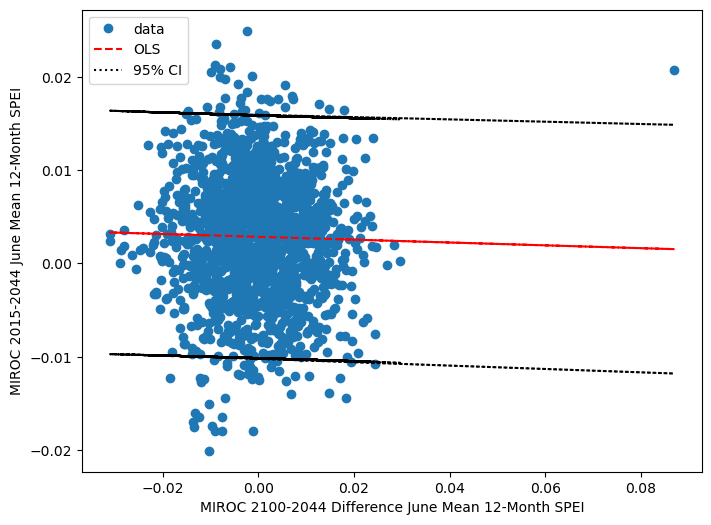

In [10]:
stat_plot(miroc_diff_arr, miroc_44_arr, "miroc_trend_plot.png", "MIROC 2100-2044 Difference June Mean 12-Month SPEI", "MIROC 2015-2044 June Mean 12-Month SPEI", False, True)

Simpler version of hist_plotter2 which only plots a single model distribution

In [11]:
def hist_plotter1(mask_arr1):
    if mask_arr2[0] == second_present:
        mod_arr1 = mask_arr1.ravel()
        mod_arr1 = mod_arr1[~np.isnan(mod_arr1)]
        plt.hist(mod_arr1, bins = "auto")
        #plt.hist(mod_arr1 + 0.1, bins = "auto")
        xaxis1 = np.arange(-np.max(mod_arr1), np.max(mod_arr1), 0.001)
        mean1 = np.mean(xaxis)
        std1 = np.std(xaxis)
        plt.plot(xaxis1, stats.norm.pdf(xaxis1, mean1, std1))
        #plt.plot(xaxis1 + 1, stats.norm.pdf(xaxis1, mean1, std1))

Histogram plotter for two models to compare distribution shapes

In [17]:
def hist_plotter2(mask_arr1, label1, mask_arr2, label2, title):
    fig = plt.figure(figsize =  (7, 7))
    mod_arr1 = mask_arr1.ravel()
    mod_arr2 = mask_arr2.ravel()
    mod_arr1 = mod_arr1[~np.isnan(mod_arr1)]
    mod_arr2 = mod_arr2[~np.isnan(mod_arr2)]
    color1 = "tab:blue"
    color2 = "tab:orange"
    #hist_range = [-0.04, 0.04]
    plt.hist(mod_arr1, color = color1, bins = "auto")#, range = hist_range)
    plt.hist(mod_arr2, histtype = "step", hatch = "////", color = color2, bins = "auto")#, range = hist_range)
    plt.axvline(x = 0, color = "k", alpha = 0.5)
    xaxis1 = np.arange(-np.max(mod_arr1), np.max(mod_arr1), 0.001)
    xaxis2 = np.arange(-np.max(mod_arr2), np.max(mod_arr2), 0.001)
    mean1 = np.mean(xaxis1)
    mean2 = np.mean(xaxis2)
    std1 = np.std(xaxis1)
    std2 = np.std(xaxis2)
    handles = [Rectangle((0,0),1,1, color=c) for c in [color1, color2]]
    labels= [label1, label2]
    plt.legend(handles, labels)
    plt.xlabel("12-Month SPEI")
    plt.ylabel("Count")
    plt.title(title)
    #plt.savefig("bcc_spei_diff_comp_presentation.png", transparent = True)

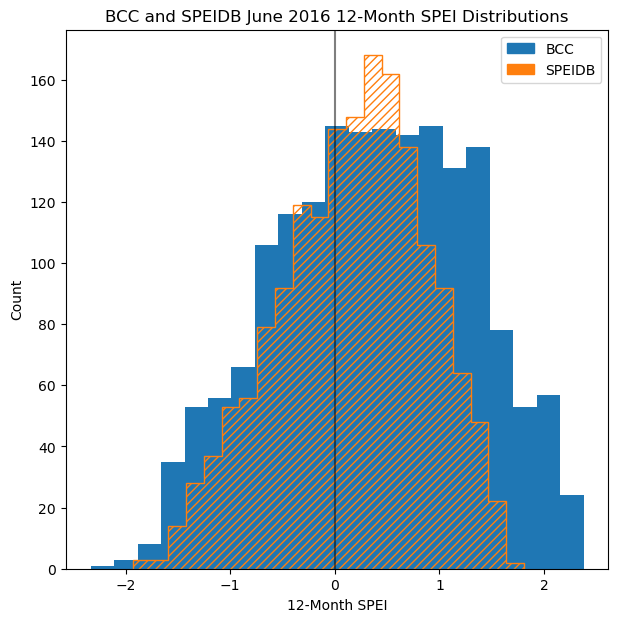

In [13]:
array1 = np.array(bcc_2044.sel(time = 18).spei12mon.where(bcc_land_mask == 0))
array2 = np.array(speidb_last6yr.isel(time = 5).spei.interp(lon = bcc_2044.lon - 360, lat = bcc_2044.lat).where(bcc_land_mask == 0))
bcc_array = np.array(bcc_2044.sel(time = 18).spei12mon.where(bcc_land_mask == 0))
speidb_array = np.array(speidb_last6yr.isel(time = 5).interp(lon = bcc_2044.lon - 360, lat = bcc_2044.lat).spei.where(bcc_land_mask == 0))
hist_plotter2(bcc_array, "BCC", speidb_array, "SPEIDB", "BCC and SPEIDB June 2016 12-Month SPEI Distributions")

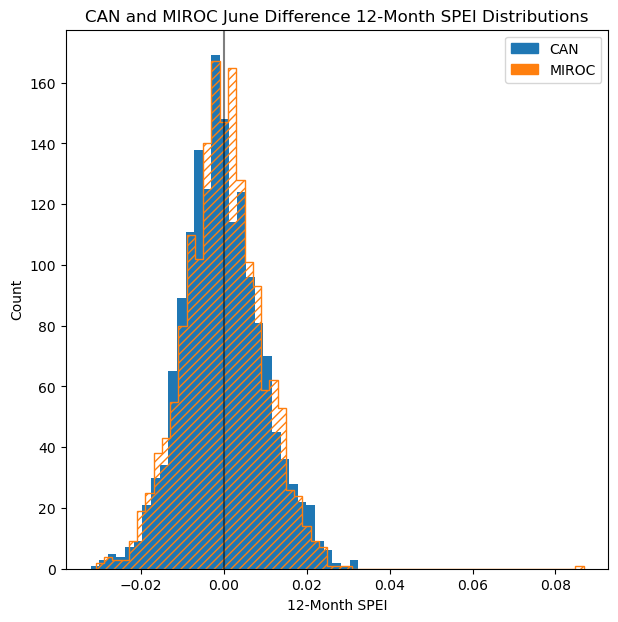

In [14]:
can_array = np.array(can_diff_summean_mask)
miroc_array = np.array(miroc_diff_summean_mask)
#all_44_array = np.array(all_44_summean_mask)
#all_diff_array = np.array(all_diff_summean_mask)
#hist_plotter2(all_44_array, "4MM 44", all_diff_array, "4MM diff", "4MM 2044 and Diff 12-Month SPEI Distributions")
hist_plotter2(can_array, "CAN", miroc_array, "MIROC", "CAN and MIROC June Difference 12-Month SPEI Distributions")